# Práctica 2: Modelo cinemático inverso de un manipulador y planteamiento de trayectoria

## Objetivo

El objetivo de esta práctica es que el alumno comprenda, interprete y modifique la información básica de los formatos de Universal Robot Description File (URDF).


### Metas 

- Que el alumno aplique un modelo cinemático inverso para calcular una trayectoria a partir de una posición actual hacia una posición final
- Que el alumno grafique y analice los resultados del modelo

### Contribución al perfil del egresado

La siguiente práctica contribuye en los siguientes puntos al perfil del egresado:

#### Aptitudes y habilidades

- Para modelar, simular e interpretar el comportamiento de los sistemas mecatrónicos.
- Para diseñar, construir, operar y mantener los sistemas mecatrónicos y sus componentes.

#### Actitudes

- Tener confianza en su preparación académica.
- Comprometido con su actualización, superación y competencia profesional.

#### De tipo social

- Promover el cambio en la mentalidad frente a la competitividad internacional.

## Rúbrica de evaluación

La evaluación de la práctica contará de los siguientes puntos y se evaluará con los siguientes criterios:

| Elemento | Porcentaje |
| ------:| -----------:|
| **Cuestionario previo** | 15% | 
| **Desarrollo** | 35% |
| **Análisis de resultados**  | 35% |
| **Conclusiones** | 15% |

<br>


| Elemento | Malo | Regular | Bueno |
| ------:| ------ | --------| ------|
| **Cuestionario previo** | El trabajo no contiene cuestionario previo o todas las preguntas son incorrectas (0%)| Al menos la mitad de las preguntas son correctas (8%) |  Todas las preguntas son correctas (15%) |
| **Desarrollo** | El trabajo no contiene desarrollo o su planteamiento no concuerda con lo deseado (0%) | El desarrollo está mal planteado o no llega a los resultados esperados (10%) | El desarrollo tiene un planteamiento adecuado y llega a los resultados esperados (35%) |
| **Análisis de resultados**  | El trabajo no contiene análisis de resultados o la información no se está interpretando correctamente (0%) | La interpretación de los resultados es parcial o desorganizada (10%) | Realiza un correcto análisis de los resultados de forma organizada   (35%) |
| **Conclusiones** | El trabajo no contiene conclusiones o no hacen referencia al trabajo desarrollado y los objetivos planteados (0%) | La redacción de las conclusiones es desorganizada o confusa (8%) | Las conclusiones del trabajo son claras y hacen referencia al trabajo desarrollado y los objetivos planteados (15%) | 



## Introducción

### Transformaciones homogéneas
Las transformaciones homogéneas permiten hacer el planteamiento del modelo cinemático de un robot, considerando las posiciones y orientaciones de las juntas del robot respecto al sistema de referencia de una junta anterior

Este planteamiento es el **modelo de cinemática directa**, que nos permite obtener la posición y velocidad del efector final de un manipulador en términos de los valores de la posición y velocidad de sus juntas (espacio de trabajo)

A través de este modelo se puede obtener el **modelo de cinemática inversa**, que permite obtener la velocidad de las juntas de un robot a partir de la velocidad deseada del efector final.

### Planteamiento de una trayectoria
Si se conoce el punto inicial y final de una trayectoria deseada, se pueden obtener los puntos intermedios de la trayectoria. La forma más fácil de realizar esta interpolación es a través de un spline. El orden del spline permitirá controlar las condiciones inicial y final de la posición, velocidad ó aceleración que tendrá el efector final durante el trayecto. 

Juntando la interpolación de la trayectoria y el modelo de la cinemática inversa, se pueden obtener todos los puntos intermedios de la trayectoria que deben seguir las juntas del robot para que el efector final siga una trayectoria.

## Cuestionario previo

Responder de forma breve las siguientes preguntas:

- ¿Que son las transformaciones homogéneas?
>Son herramientas matemáticas que permiten describir la posición y orientación de un objeto en el espacio, combinando traslaciones y rotaciones en una sola expresión.

- ¿Que nos permite obtener el modelo de cinemática directa de un manipulador?
>Permite conocer la posición y orientación del efector final a partir de los valores articulares del manipulador.

- ¿Que nos permite obtener el modelo de cinemática inversa de un manipulador?
>Permite calcular los valores articulares necesarios para alcanzar una posición y orientación deseada del efector final.

- ¿De que formas se puede interpolar la trayectoria de un efector final entre dos puntos?
>Mediante interpolación en el espacio de la tarea (trayectorias cartesianas) o en el espacio articular (trayectorias de juntas).

## Desarrollo

### 1. Planteamiento de la cinemática directa
En esta primera parte, se crearán las transformaciones homogéneas y el modelo de cinemática directa de un robot RRR, incluyendo la matriz del Jacobiano. Se recomienda usar **Sympy** para el planteamiento de las expresiones. 
Un diagrama del robot se muestra en la imagen:

<img src="imagenes/p2_1.png" alt = "Robot RRR" width="300" height="300" display= "block"/>

** Considerar valores cualesquiera para las dimensiones de los eslabones y la posición inicial de las juntas

In [1]:
#Importaciones
from sympy import *
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Definición de la clase GeneradorTrayectoria
class GeneradorTrayectoria():
    def __init__(self, dim = (0.3, 0.3, 0.3)):
        self.dim = dim

generador = GeneradorTrayectoria()

In [3]:
# Cálculo de matriz de transformación homogénea
def trans_homo(self, x, y, z, gamma, beta, alpha):
    R_z = Matrix([[cos(alpha), -sin(alpha), 0], [sin(alpha), cos(alpha), 0], [0, 0, 1]])
    R_y = Matrix([[cos(beta), 0, -sin(beta)], [0, 1, 0], [sin(beta), 0, cos(beta)]])
    R_x = Matrix([[1, 0, 0], [0, cos(gamma), -sin(gamma)], [0, sin(gamma), cos(gamma)]])
    R = R_x * R_y * R_z
    p = Matrix([[x], [y], [z]])
    T = Matrix.vstack(Matrix.hstack(R, p), Matrix([[0, 0, 0, 1]]))
    return T

generador.trans_homo = trans_homo.__get__(generador)
        


In [4]:
# Cálculo de la cinemática directa
def cinematica_directa(self):
    print("Generando cinematica directa")
    self.theta_0_1, self.theta_1_2, self.theta_2_3 = symbols("theta_0_1 theta_1_2 theta_2_3")
    #Matrices de transformación
    self.T_0_1 = self.trans_homo(0, 0, 0, pi/2, 0, self.theta_0_1)
    self.T_1_2 = self.trans_homo(self.dim[0], 0, 0, 0, 0, self.theta_1_2)
    self.T_2_3 = self.trans_homo(self.dim[1], 0, 0, 0, 0, self.theta_2_3)
    self.T_3_P = self.trans_homo(self.dim[2], 0, 0, 0, 0, 0)
    self.T_0_P = simplify(self.T_0_1 * self.T_1_2 * self.T_2_3 * self.T_3_P)
    #Vector de postura xi = [x z th]
    self.xi_0_P = Matrix([[self.T_0_P[0, 3]],
                          [self.T_0_P[2, 3]],
                          [self.theta_0_1 + self.theta_1_2 + self.theta_2_3]])

generador.cinematica_directa = cinematica_directa.__get__(generador)
generador.cinematica_directa()

Generando cinematica directa


### 2. Planteamiento de la trayectoria

En esta segunda parte, se planteará el código que permita definir los puntos intermedios de una trayectoria, la cual debe tener velocidades y aceleraciones nulas al inicio y al final. Se deben incluir también las gráficas de la posición, velocidad y aceleración del efector final. 

Calcular la trayectoria considerando de forma general tiempo de duración, puntos inicial y final, y con una tasa de muestreo de 30 muestras por segundo. 

Creando trayectoria
Vector segunda derivada
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(3*t**5/16 - 15*t**4/16 + 5*t**3/4) + 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.3*sqrt(2)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(3*t**5/16 - 15*t**4/16 + 5*t**3/4) + 0.3*sqrt(1/2 - sqrt(2)/4)], [-pi*(3*t**5/16 - 15*t**4/16 + 5*t**3/4)/8 + pi/8]])
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(15*t**4/16 - 15*t**3/4 + 15*t**2/4)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(15*t**4/16 - 15*t**3/4 + 15*t**2/4)], [-pi*(15*t**4/16 - 15*t**3/4 + 15*t**2/4)/8]])
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(15*t**3/4 - 45*t**2/4 + 15*t/2)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(15*t**3/4 - 45*t**2/4 + 15*t/2)], [-pi*(15*t**3/4 - 45*t**2/4 + 15*t/2)/8]])
Muestreando trayectoria
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


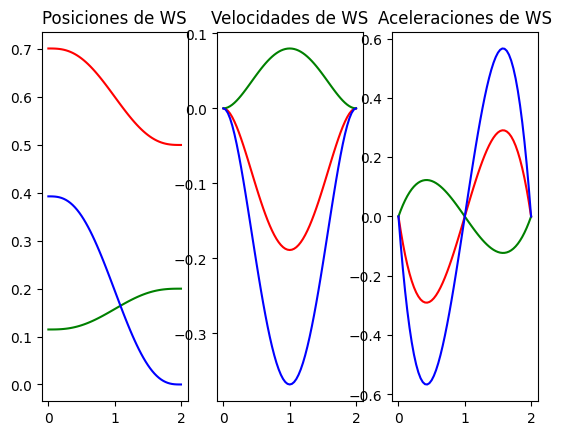

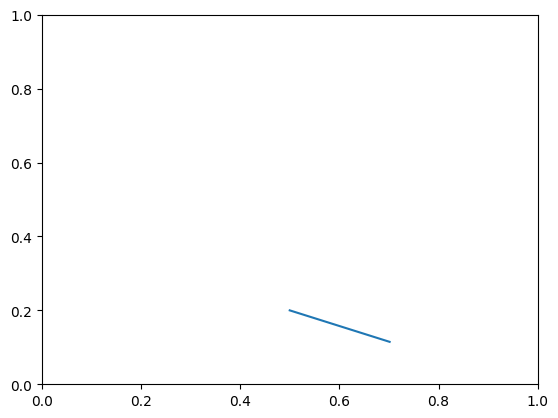

In [5]:
def generar_trayectoria(self, q_in = (pi/4, -pi/2, 3*pi/8), xi_fn = (0.5, 0.2, 0), tie = (0, 2), frec = 30):
    print("Creando trayectoria")
    #Variables para polinomio lambda
    self.t, self.a_0, self.a_1, self.a_2, self.a_3, self.a_4, self.a_5 = symbols(
    "t a_0 a_1 a_2 a_3 a_4 a_5")
    #Polinomio lambda lam = a0 + a1t + a2t^2 + a3t^3 + a4t^4 + a5t^5
    self.lam = self.a_0 + self.a_1 * self.t + self.a_2 * (self.t)**2 + self.a_3 * (self.t)**3 + self.a_4 * (self.t)**4+ self.a_5 * (self.t)**5
    #Primera y segunda derivada de lambda
    self.lam_dot = diff(self.lam, self.t)
    self.lam_dot_dot = diff(self.lam_dot, self.t)
    # Cálculo de parámetros de lambda. 
    # Planteando ecuaciones igualadas a cero
    # lam(t=ti) = 0
    # lam(t=tf) = 1   ==>  lam(t=tf) -1 = 0
    # lam'(t=ti) = 0
    # lam'(t=tf) = 0
    # lam''(t=ti) = 0
    # lam''(t=tf) = 0
    ec_1 = self.lam.subs(self.t, tie[0])
    ec_2 = self.lam.subs(self.t, tie[1]) - 1
    ec_3 = self.lam_dot.subs(self.t, tie[0])
    ec_4 = self.lam_dot.subs(self.t, tie[1])
    ec_5 = self.lam_dot_dot.subs(self.t, tie[0])
    ec_6 = self.lam_dot_dot.subs(self.t, tie[1])
    # Resolviendo sistema para las variables a0-a5
    terminos = solve([ec_1, ec_2, ec_3, ec_4, ec_5, ec_6], [self.a_0, self.a_1, self.a_2, self.a_3, self.a_4, self.a_5], dict = True)
    # Tomando la primera solución devuelta y sustituyéndola en el polinomio
    self.lam_s          = self.lam.subs(terminos[0])
    self.lam_dot_s      = self.lam_dot.subs(terminos[0])
    self.lam_dot_dot_s  = self.lam_dot_dot.subs(terminos[0])

    # Calculo de la posicion inicial del efector final a partir del vector de postura
    xi_in = self.xi_0_P.subs({
      self.theta_0_1: q_in[0],
      self.theta_1_2: q_in[1],
      self.theta_2_3: q_in[2]
    })
    # Posiciones de espacio de trabajo
    # xi = xi_in + lam(t) * (xi_fn - xi_in) 
    self.xi = xi_in + Matrix([
      [self.lam_s * (xi_fn[0] - xi_in[0])],
      [self.lam_s * (xi_fn[1] - xi_in[1])],
      [self.lam_s * (xi_fn[2] - xi_in[2])]
    ])
    # Velocidades de espacio de trabajo
    # xi' = lam'(t) * (xi_fn - xi_in)
    self.xi_dot = Matrix([
      [self.lam_dot_s * (xi_fn[0] - xi_in[0])],
      [self.lam_dot_s * (xi_fn[1] - xi_in[1])],
      [self.lam_dot_s * (xi_fn[2] - xi_in[2])]
    ])
    # Aceleraciones de espacio de trabajo
    # xi'' = lam''(t) * (xi_fn - xi_in)
    self.xi_dot_dot = Matrix([
      [self.lam_dot_dot_s * (xi_fn[0] - xi_in[0])],
      [self.lam_dot_dot_s * (xi_fn[1] - xi_in[1])],
      [self.lam_dot_dot_s * (xi_fn[2] - xi_in[2])]
    ])
    print("Vector segunda derivada")
    print(self.xi)
    print(self.xi_dot)
    print(self.xi_dot_dot)

    # Muestreo del espacio de trabajo
    print("Muestreando trayectoria")
    # Número de muestras e incremento de tiempo
    self.muestras = int(frec * (tie[1] - tie[0]) + 1)
    self.dt = 1.0 / frec

    # Muestreo de tiempo entre tf y ti
    self.t_m = Matrix.zeros(1, self.muestras)
    self.t_m[0,0] = tie[0]
    for a in range(self.muestras - 1):
      self.t_m[0, a + 1] = self.t_m[0, a] + self.dt

    # Matrices vacías para guardar valores del espacio de trabajo
    # 3 filas, n columnas (cada columna es una posición/velocidad/aceleración del espacio de trabajo en un instante)
    self.xi_m         = Matrix.zeros(3, self.muestras)
    self.xi_dot_m     = Matrix.zeros(3, self.muestras)
    self.xi_dot_dot_m = Matrix.zeros(3, self.muestras)

    # Generando funciones para evitar usar lenguaje simbólico en las sustituciones
    xi_m_func =         lambdify([self.t], self.xi)
    xi_dot_m_func =     lambdify([self.t], self.xi_dot)
    xi_dot_dot_m_func = lambdify([self.t], self.xi_dot_dot)
    for a in range(self.muestras):
      """Así se sustituiría directo
      self.xi_m[:,a]          = self.xi.subs(self.t, self.t_m[0, a])
      self.xi_dot_m[:,a]      = self.xi_dot.subs(self.t, self.t_m[0, a])
      self.xi_dot_dot_m[:,a]  = self.xi_dot_dot.subs(self.t, self.t_m[0, a])"""
      self.xi_m[:, a]         = xi_m_func(float(self.t_m[0, a]))
      self.xi_dot_m[:, a]     = xi_dot_m_func(float(self.t_m[0, a]))
      self.xi_dot_dot_m[:, a] = xi_dot_dot_m_func(float(self.t_m[0, a]))
      print(a)

    #Agregando posición inicial como variable de la clase
    self.q_in = q_in

def datos_ws(self):
    fig, ((xi_g, xi_dot_g, xi_dot_dot_g)) = plt.subplots(nrows=1, ncols = 3)
    # Posiciones ws
    xi_g.set_title("Posiciones de WS")
    xi_g.plot(self.t_m.T, self.xi_m[0, :].T, color = "RED")
    xi_g.plot(self.t_m.T, self.xi_m[1, :].T, color = "GREEN")
    xi_g.plot(self.t_m.T, self.xi_m[2, :].T, color = "BLUE")

    # Velocidades ws
    xi_dot_g.set_title("Velocidades de WS")
    xi_dot_g.plot(self.t_m.T, self.xi_dot_m[0, :].T, color = "RED")
    xi_dot_g.plot(self.t_m.T, self.xi_dot_m[1, :].T, color = "GREEN")
    xi_dot_g.plot(self.t_m.T, self.xi_dot_m[2, :].T, color = "BLUE")

    # Aceleraciones ws
    xi_dot_dot_g.set_title("Aceleraciones de WS")
    xi_dot_dot_g.plot(self.t_m.T, self.xi_dot_dot_m[0, :].T, color = "RED")
    xi_dot_dot_g.plot(self.t_m.T, self.xi_dot_dot_m[1, :].T, color = "GREEN")
    xi_dot_dot_g.plot(self.t_m.T, self.xi_dot_dot_m[2, :].T, color = "BLUE")

    """# Posiciones q
    q_g.set_title("Posiciones de q")
    q_g.plot(self.t_m.T, self.q_m[0, :].T, color = "RED")
    q_g.plot(self.t_m.T, self.q_m[1, :].T, color = "GREEN")
    q_g.plot(self.t_m.T, self.q_m[2, :].T, color = "BLUE")

    # Velocidades q
    q_dot_g.set_title("Velocidades de q")
    q_dot_g.plot(self.t_m.T, self.q_dot_m[0, :].T, color = "RED")
    q_dot_g.plot(self.t_m.T, self.q_dot_m[1, :].T, color = "GREEN")
    q_dot_g.plot(self.t_m.T, self.q_dot_m[2, :].T, color = "BLUE")

    # Aceleraciones q
    q_dot_dot_g.set_title("Aceleraciones de q")
    q_dot_dot_g.plot(self.t_m.T, self.q_dot_dot_m[0, :].T, color = "RED")
    q_dot_dot_g.plot(self.t_m.T, self.q_dot_dot_m[1, :].T, color = "GREEN")
    q_dot_dot_g.plot(self.t_m.T, self.q_dot_dot_m[2, :].T, color = "BLUE")"""

    plt.show()

def graficar_ws(self):
    plt.plot(self.xi_m[0, :].T, self.xi_m[1, :].T)
    plt.axis((0, 1, 0, 1))
    plt.show()


generador.datos_ws = datos_ws.__get__(generador)
generador.graficar_ws = graficar_ws.__get__(generador)

generador.generar_trayectoria = generar_trayectoria.__get__(generador)
generador.generar_trayectoria()
generador.datos_ws()
generador.graficar_ws()


### 3. Cinemática inversa
A partir del modelo de la cinemática directa, obtener la expresión e la cinemática inversa, que relacione las velocidades de las juntas del robot con la velocidad del efector final. Ya que el modelo de cinemática inversa sólo permite obtener velocidades, obtener también expresiones que permitan obtener la posición de las juntas y sus aceleraciones

Calculando cinematica inversa
Calculando puntos
Iteración: 0
Iteración: 1
Iteración: 2
Iteración: 3
Iteración: 4
Iteración: 5
Iteración: 6
Iteración: 7
Iteración: 8
Iteración: 9
Iteración: 10
Iteración: 11
Iteración: 12
Iteración: 13
Iteración: 14
Iteración: 15
Iteración: 16
Iteración: 17
Iteración: 18
Iteración: 19
Iteración: 20
Iteración: 21
Iteración: 22
Iteración: 23
Iteración: 24
Iteración: 25
Iteración: 26
Iteración: 27
Iteración: 28
Iteración: 29
Iteración: 30
Iteración: 31
Iteración: 32
Iteración: 33
Iteración: 34
Iteración: 35
Iteración: 36
Iteración: 37
Iteración: 38
Iteración: 39
Iteración: 40
Iteración: 41
Iteración: 42
Iteración: 43
Iteración: 44
Iteración: 45
Iteración: 46
Iteración: 47
Iteración: 48
Iteración: 49
Iteración: 50
Iteración: 51
Iteración: 52
Iteración: 53
Iteración: 54
Iteración: 55
Iteración: 56
Iteración: 57
Iteración: 58
Iteración: 59


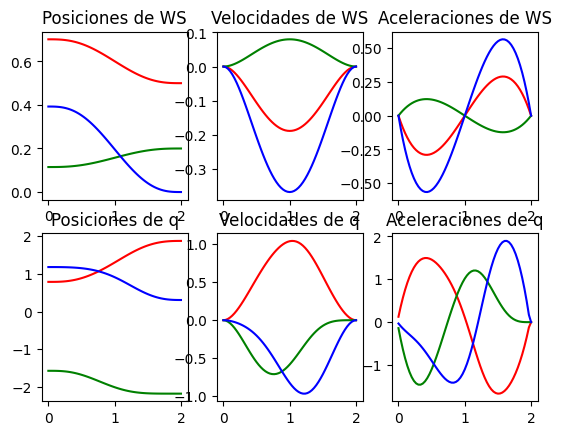

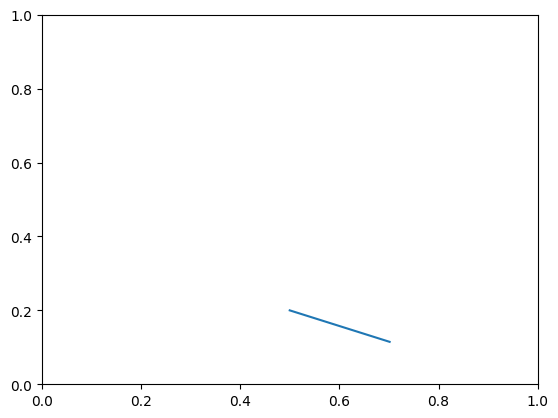

In [6]:
def cinematica_inversa(self):
    print("Calculando cinematica inversa")
    # Variables para los valores de las velocidades del ws
    self.x_0_P_dot, self.z_0_P_dot, self.theta_0_P_dot = symbols(
    "x_0_P_dot z_0_P_dot theta_0_P_dot")
    # Derivada del vector de postura en términos de las velocidades del efector final
    # xi' = [x' z' th'] 
    self.xi_dot = Matrix([[self.x_0_P_dot], [self.z_0_P_dot], [self.theta_0_P_dot]])
    # Jacobiano
    self.J = Matrix.hstack(diff(self.xi_0_P, self.theta_0_1), 
                           diff(self.xi_0_P, self.theta_1_2), 
                           diff(self.xi_0_P, self.theta_2_3))
    self.J_inv = self.J.inv()
    # De la primera derivada, despejamos q': 
    # xi' = J * q'
    # q' = J-1 * xi'
    self.q_dot = self.J_inv * self.xi_dot

    # Crear una función a partir de la expresión simbólica
    q_dot_func = lambdify([self.x_0_P_dot, self.z_0_P_dot, self.theta_0_P_dot, self.theta_0_1, self.theta_1_2, self.theta_2_3], self.q_dot)

    # Matrices vacías para los valores de espacio de las juntas
    self.q_m         = Matrix.zeros(3, self.muestras)
    self.q_dot_m     = Matrix.zeros(3, self.muestras)
    self.q_dot_dot_m = Matrix.zeros(3, self.muestras)
    # Agregando posición inicial (dato)
    self.q_m[:,0] = Matrix([[self.q_in[0]], [self.q_in[1]], [self.q_in[2]]])
    # Agregando velocidad inicial
    # q' = J-1 * xi' => Obtenemos velocidad de las juntas 
    # en el punto actual sustituyendo velocidad actual del efector y 
    # posición actual de las juntas
    """Así se sustituiría directo
      q_dot_m[:,0] = self.q_dot.subs({
      self.x_0_P_dot:     xi_dot_m[0, 0],
      self.z_0_P_dot:     xi_dot_m[1, 0],
      self.theta_O_P_dot: xi_dot_m[2, 0],
      self.theta_O_1:     q_m[0, 0],
      self.theta_1_2:     q_m[1, 0],
      self.theta_2_3:     q_m[2, 0]})"""

    self.q_dot_m[:, 0] = q_dot_func(
        float(self.xi_dot_m[0, 0]),
        float(self.xi_dot_m[1, 0]),
        float(self.xi_dot_m[2, 0]),
        float(self.q_m[0, 0]),
        float(self.q_m[1, 0]),
        float(self.q_m[2, 0])
    )

    print("Calculando puntos")
    for a in range(self.muestras - 1):
      # Posición de las juntas
      # Posición siguiente = posición actual + velocidad actual * dt 
      self.q_m[:,a+1] = self.q_m[:,a] + self.q_dot_m[:,a] * self.dt
      # Velocidad de las juntas 
      # Velocidad siguiente de las juntas a partir de velocidad siguiente del efector y posición siguiente de las juntas
      """self.q_dot_m[:,a+1] = self.q_dot.subs({
                                          self.x_0_P_dot:     xi_dot_m[0, a],
                                          self.z_0_P_dot:     xi_dot_m[1, a],
                                          self.theta_O_P_dot: xi_dot_m[2, a],
                                          self.theta_O_1:     q_m[0, a],
                                          self.theta_1_2:     q_m[1, a],
                                          self.theta_2_3:     q_m[2, a]})"""
      self.q_dot_m[:, a + 1] = q_dot_func(
        float(self.xi_dot_m[0, a + 1]),
        float(self.xi_dot_m[1, a + 1]),
        float(self.xi_dot_m[2, a + 1]),
        float(self.q_m[0, a + 1]),
        float(self.q_m[1, a + 1]),
        float(self.q_m[2, a + 1]))
        
      # Aceleración
      # Aceleración actual = velocidad siguiente - velocidad actual / dt
      self.q_dot_dot_m[:,a] = (self.q_dot_m[:,a+1] - self.q_dot_m[:,a]) / self.dt

      print("Iteración: " + str(a))
    # Aceleración final (cero)
    self.q_dot_dot_m[:, self.muestras - 1] = Matrix.zeros(3, 1)

def datos_trayectoria(self):
    fig, ((xi_g, xi_dot_g, xi_dot_dot_g),
              (q_g, q_dot_g, q_dot_dot_g)) = plt.subplots(nrows=2, ncols = 3)
    # Posiciones ws
    xi_g.set_title("Posiciones de WS")
    xi_g.plot(self.t_m.T, self.xi_m[0, :].T, color = "RED")
    xi_g.plot(self.t_m.T, self.xi_m[1, :].T, color = "GREEN")
    xi_g.plot(self.t_m.T, self.xi_m[2, :].T, color = "BLUE")

    # Velocidades ws
    xi_dot_g.set_title("Velocidades de WS")
    xi_dot_g.plot(self.t_m.T, self.xi_dot_m[0, :].T, color = "RED")
    xi_dot_g.plot(self.t_m.T, self.xi_dot_m[1, :].T, color = "GREEN")
    xi_dot_g.plot(self.t_m.T, self.xi_dot_m[2, :].T, color = "BLUE")

    # Aceleraciones ws
    xi_dot_dot_g.set_title("Aceleraciones de WS")
    xi_dot_dot_g.plot(self.t_m.T, self.xi_dot_dot_m[0, :].T, color = "RED")
    xi_dot_dot_g.plot(self.t_m.T, self.xi_dot_dot_m[1, :].T, color = "GREEN")
    xi_dot_dot_g.plot(self.t_m.T, self.xi_dot_dot_m[2, :].T, color = "BLUE")

    # Posiciones q
    q_g.set_title("Posiciones de q")
    q_g.plot(self.t_m.T, self.q_m[0, :].T, color = "RED")
    q_g.plot(self.t_m.T, self.q_m[1, :].T, color = "GREEN")
    q_g.plot(self.t_m.T, self.q_m[2, :].T, color = "BLUE")

    # Velocidades q
    q_dot_g.set_title("Velocidades de q")
    q_dot_g.plot(self.t_m.T, self.q_dot_m[0, :].T, color = "RED")
    q_dot_g.plot(self.t_m.T, self.q_dot_m[1, :].T, color = "GREEN")
    q_dot_g.plot(self.t_m.T, self.q_dot_m[2, :].T, color = "BLUE")

    # Aceleraciones q
    q_dot_dot_g.set_title("Aceleraciones de q")
    q_dot_dot_g.plot(self.t_m.T, self.q_dot_dot_m[0, :].T, color = "RED")
    q_dot_dot_g.plot(self.t_m.T, self.q_dot_dot_m[1, :].T, color = "GREEN")
    q_dot_dot_g.plot(self.t_m.T, self.q_dot_dot_m[2, :].T, color = "BLUE")

    plt.show()

def graficar_trayectoria(self):
    # Cinematica directa de cada sistema de referencia
    self.T_0_2 = self.T_0_1 * self.T_1_2
    self.T_0_3 = self.T_0_2 * self.T_2_3
    
    plt.plot(self.xi_m[0, :].T, self.xi_m[1, :].T)
    plt.axis((0, 1, 0, 1))
    plt.show()

generador.datos_trayectoria = datos_trayectoria.__get__(generador)
generador.cinematica_inversa = cinematica_inversa.__get__(generador)
generador.graficar_trayectoria = graficar_trayectoria.__get__(generador)

generador.cinematica_inversa()
generador.datos_trayectoria()
generador.graficar_trayectoria()

### 4. Aplicación de la cinemática inversa
Finalmente, a partir de los puntos de la trayectoria y el modelo de cinemática inversa, obtener las posiciones, velocidades y aceleraciones de las juntas del robot, así como sus gráficas en función del tiempo

### 5. Aplicación de la cinemática inversa
Para terminar, subir los archivos de la práctica al repositorio de github

## Análisis de resultados

- ¿Qué utilidad tuvo usar el modelo de cinemática inversa de un robot?
> Respuesta

- ¿Qué utilidad tiene el modelo de cinemática inversa de un robot?
> Respuesta

- ¿Qué utilidad tiene el modelo de cinemática inversa de un robot?
> Respuesta




## Conclusiones

> Respuesta

## Bibliografía 

> En caso de usarse, se deben hacer referencia a la información implementada en formato ieee


